<a href="https://colab.research.google.com/github/vivekihubdata/Ihub-assignments/blob/main/Copy%20of%20DTTE%20assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 1, Lab 2<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data






In [ ]:
## Standard Imports.

! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=7de4717474c0832afd121b50f9ace3349d78ddb3cb3f95e20f1031b43b81c558
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


## What are features?
### Features are individual independent variables that act like an input to your system.
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

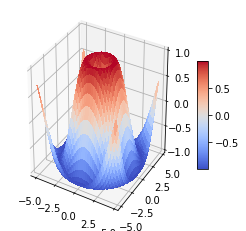

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(1))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25) # feature 1
Y = np.arange(-5, 5, 0.25) # feature 2
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R) #output
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0.4, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# Part 2: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features.They are converted into vectors (embeddings) or one hot encoded.  Let us explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
## set language and then download the data.

topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en')
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [ ]:
fr2 ## the french textual data describing the second topic.

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, i.e. if not a-z then replace with space.
  return text

In [ ]:
text1 = re.sub('[a-z]', '1', 'espèce d\'« éléphant d\?Afrique »,')
text1

"111è11 1'« é1é11111 1\\?A111111 »,"

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisatallafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminanthoofedherbivorousonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsof

Instead of directly using characters as the features, to understand a text better, we may consider group of tokens i.e. ngrams as features.

For this example let us consider that each character is one word, and let us see how n-grams work.


## nltk library provides many tools for text processing, please explore them.

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
## Dont worry if you do not understand these functions right away, you can revisit them and follow step-by-step.

# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
  zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

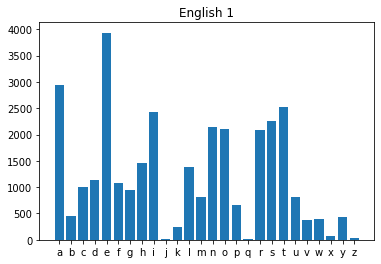

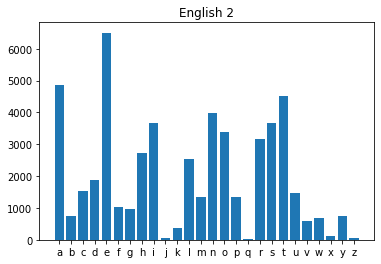

In [ ]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
## ngrams imported from nltk, it returns ngrams from given string. Counter returns dictionary with keys as elements and counts as values.
unigram_eng1 = Counter(ngrams(eng1,1)) ##just to get count of each element.
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

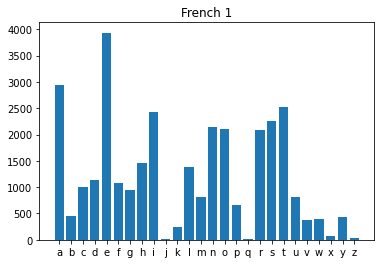

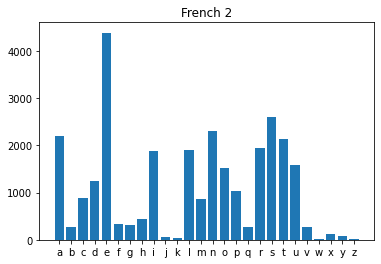

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

## A good feature is one that helps in easy prediction and classification.
## for ex : if you wish to differentiate between grapes and apples, size can be one of the useful features.

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

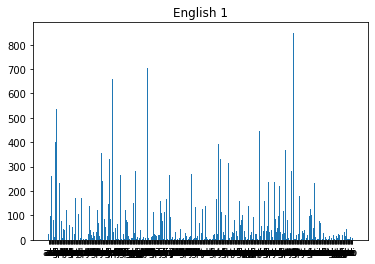

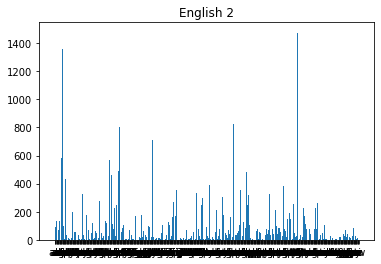

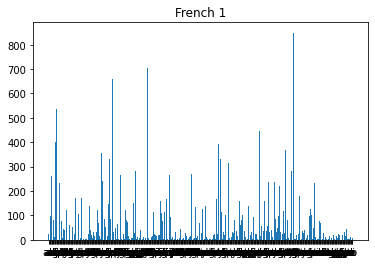

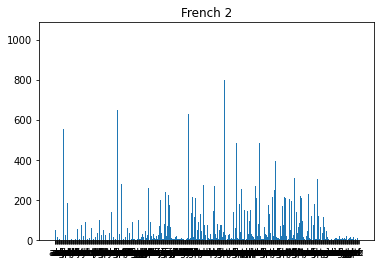

In [ ]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
## lets have a lot at bigrams.

bigram_eng1


Counter({('a', 'a'): 22,
         ('a', 'b'): 57,
         ('a', 'c'): 125,
         ('a', 'd'): 96,
         ('a', 'e'): 29,
         ('a', 'f'): 262,
         ('a', 'g'): 71,
         ('a', 'h'): 19,
         ('a', 'i'): 82,
         ('a', 'j'): 2,
         ('a', 'k'): 10,
         ('a', 'l'): 403,
         ('a', 'm'): 78,
         ('a', 'n'): 535,
         ('a', 'o'): 7,
         ('a', 'p'): 74,
         ('a', 'q'): 1,
         ('a', 'r'): 320,
         ('a', 's'): 234,
         ('a', 't'): 342,
         ('a', 'u'): 25,
         ('a', 'v'): 78,
         ('a', 'w'): 14,
         ('a', 'x'): 6,
         ('a', 'y'): 43,
         ('a', 'z'): 1,
         ('b', 'a'): 42,
         ('b', 'c'): 3,
         ('b', 'd'): 1,
         ('b', 'e'): 121,
         ('b', 'f'): 4,
         ('b', 'g'): 1,
         ('b', 'i'): 42,
         ('b', 'j'): 4,
         ('b', 'l'): 61,
         ('b', 'm'): 1,
         ('b', 'n'): 1,
         ('b', 'o'): 40,
         ('b', 'p'): 1,
         ('b', 'r'): 53,
     

In [ ]:
## a function to plot 2-D histogram. The values are color mapped.

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] #ord converts char to code
  plt.imshow(freq, cmap = 'jet')
  plt.colorbar()
  return freq

In [ ]:
ord

<function ord>

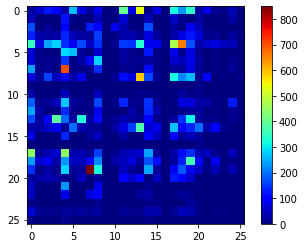

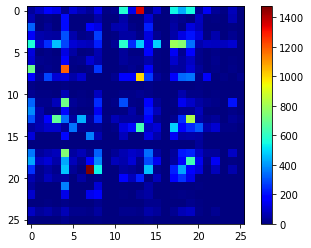

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

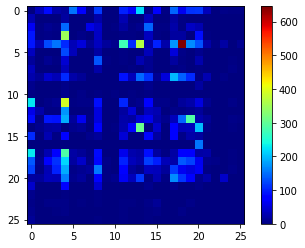

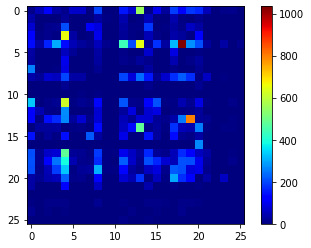

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 849.0
('h', 'e') : 703.0
('e', 's') : 661.0
('i', 'n') : 592.0
('a', 'n') : 535.0
('e', 'r') : 475.0
('r', 'e') : 449.0
('r', 'a') : 446.0
('a', 'l') : 403.0
('n', 'd') : 391.0

English 2:
('t', 'h') : 1475.0
('a', 'n') : 1361.0
('h', 'e') : 1188.0
('i', 'n') : 1008.0
('n', 't') : 826.0
('e', 'r') : 800.0
('e', 's') : 756.0
('r', 'e') : 752.0
('l', 'e') : 718.0
('h', 'a') : 712.0

French 1:
('e', 's') : 645.0
('l', 'e') : 393.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 308.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 277.0
('r', 'a') : 230.0
('l', 'a') : 227.0

French 2:
('e', 's') : 1034.0
('n', 't') : 796.0
('d', 'e') : 657.0
('e', 'n') : 650.0
('l', 'e') : 626.0
('a', 'n') : 555.0
('o', 'n') : 484.0
('r', 'e') : 484.0
('e', 'l') : 439.0
('s', 'e') : 391.0


## At times, we need to reduce the number of features. We will discuss this more in the upcoming sessions, but a small example has been discussed here. Instead of using each unique token (a word) as a feature, we reduced the number of features by using 1-gram and 2-gram of characters as features.

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

## Features of Images.
### Images in digital format are stored as numeric values, and hence we can use these values as features. for ex : a black and white (binary) image is stored as an array of 0  and 255 or 0 and 1.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

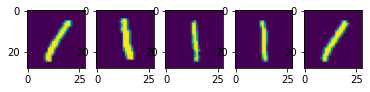

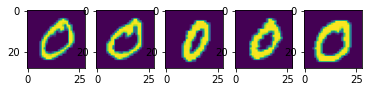

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [ ]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
sum1.shape

(6742,)

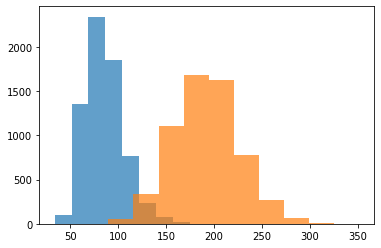

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

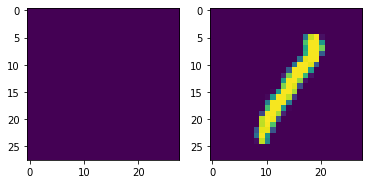

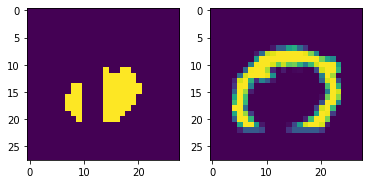

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

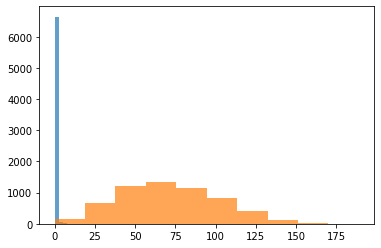

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

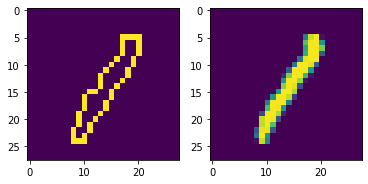

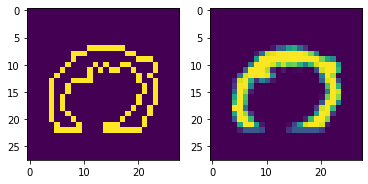

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

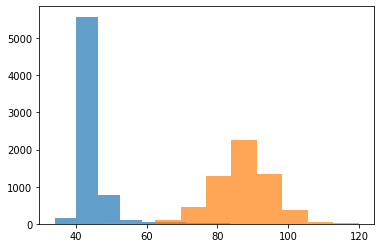

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

## Features from CSV file

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


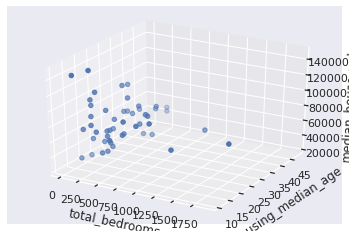

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

In [ ]:
import pandas as pd

df = pd.read_csv('/content/iris.data')

print(df.shape)
df.head()

(149, 5)


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Attribute information:

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [ ]:
features = {"5.1" : "sepal_length", "3.5" : "sepal_width", "1.4" : "petal_length", "0.2" : "petal_width", "Iris-setosa" : "species"}

df.rename(columns = features, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


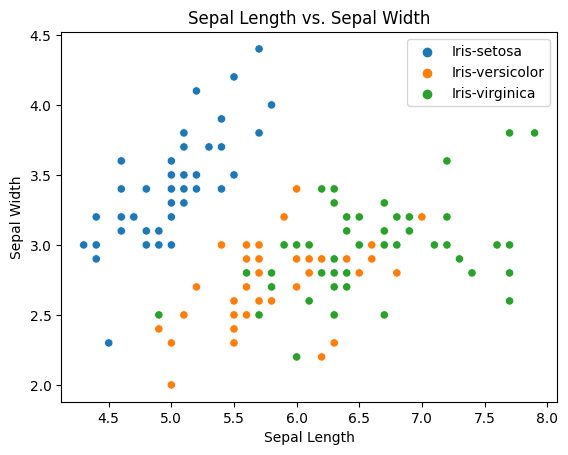

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()
plt.show()

* The Setosa species is clearly separated from the other two species in terms of sepal size. It have a smaller sepal length and width which make it easy to distinguishable from Versicolor and Virginica.


* Versicolor and Virginica have some overlap, there are regions where they can be differentiated based on sepal size.

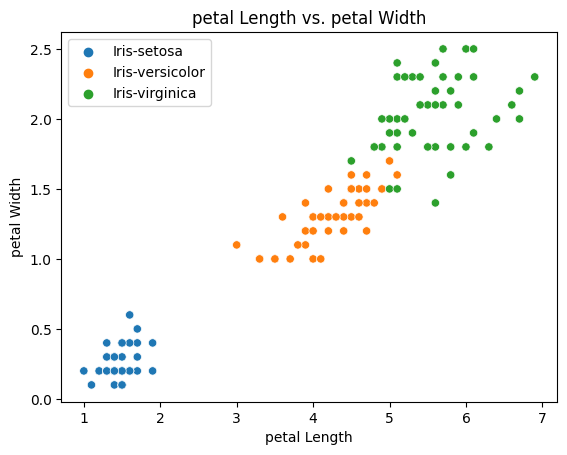

In [ ]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs. petal Width')
plt.legend()
plt.show()

* The Setosa species is clearly separated from the other two species in terms of petal size. It have a smaller sepal length and width which make it easy to distinguishable from Versicolor and Virginica.


* Versicolor and Virginica have a very small overlap, there are regions where they can be differentiated based on petal size.

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [ ]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [ ]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


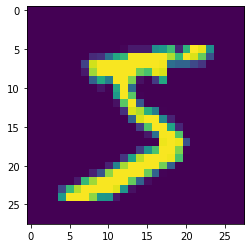

In [ ]:
plt.imshow(train_X[0])

In [ ]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

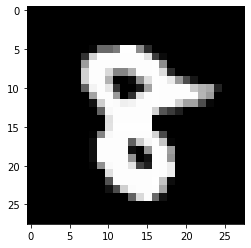

(28, 28)


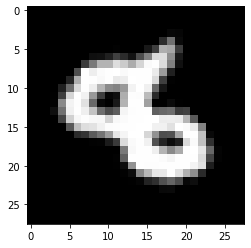

In [ ]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [ ]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple.

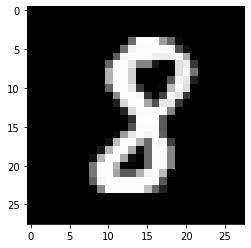

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


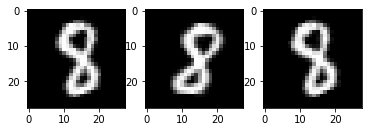

In [ ]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area.

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

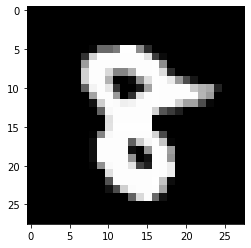

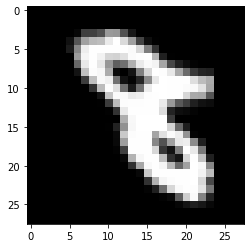

In [ ]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [ ]:
from skimage.morphology import skeletonize


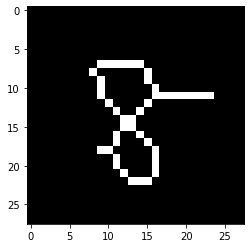

In [ ]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [ ]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [ ]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


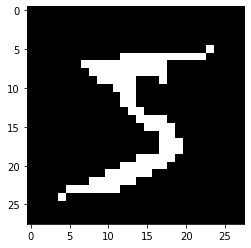

count 2


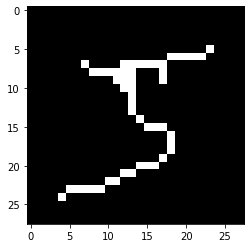

count 3


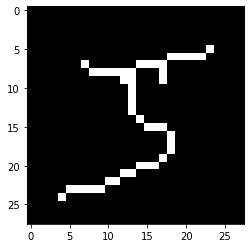

count 4


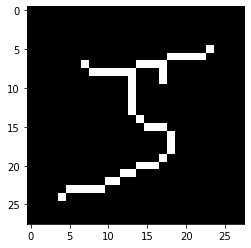

count 5


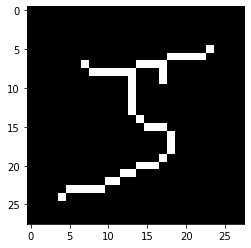

In [ ]:
skeleton_five = Skeletonization(binarized)

# **ASSIGNMENTS**
1. Modify the code to use trigrams (3-grams) instead of bigrams (2-grams) for text feature extraction. Compare and analyze the results for both English and French documents.
2. Implement a function to calculate the entropy of a given text. Entropy measures the uncertainty or randomness in a sequence of characters. Use this function to calculate the entropy of both English and French documents from the Wikipedia pages. Analyze and compare the results.
3. Extend the image augmentation techniques to include random translations (both horizontal and vertical shifts). Implement functions to perform random horizontal and vertical shifts on images. Apply these transformations to a few images from the MNIST dataset and visualize the augmented images.
4. Write a function to calculate the Euclidean distance between two given texts represented as n-grams (e.g., unigrams, bigrams, etc.). Use this function to compare the similarity between the English and French documents. Discuss the implications and limitations of using n-grams for text similarity comparison.
5. Download a sample archive text from Project Gutenberg (https://www.gutenberg.org/) and validate the findings for English and French stories.






# Solutions

## Question 1

In [1]:
! pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=5dd91e83f3c55e08499cd3849d5e889b680826eb38c3e974668647012f929f1e
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [36]:
import wikipedia
import re
import nltk

from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

In [37]:
# Download the data from wikipedia

topic1 = 'kerala'
topic2 = 'Tamilnadu'

wikipedia.set_lang('en')
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



In [38]:
#re.findall(r'[0-9]+', 'a4bc123xy845z8')

In [39]:
def text_cleaning(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

In [40]:
# cleaning text

eng1 = text_cleaning(eng1)
eng2 = text_cleaning(eng2)
fr1 = text_cleaning(fr1)
fr2 = text_cleaning(fr2)

In [41]:
# Creating trigrams

trigram_eng1 = Counter(ngrams(eng1,3))
trigram_eng2 = Counter(ngrams(eng2,3))
trigram_fr1 = Counter(ngrams(fr1,3))
trigram_fr2 = Counter(ngrams(fr2,3))

In [23]:
print(trigram_eng1)

Counter({('t', 'h', 'e'): 596, ('a', 'n', 'd'): 273, ('i', 'r', 'a'): 233, ('r', 'a', 'f'): 229, ('g', 'i', 'r'): 227, ('a', 'f', 'f'): 225, ('f', 'f', 'e'): 208, ('i', 'n', 'g'): 205, ('i', 'o', 'n'): 137, ('e', 's', 't'): 125, ('m', 'a', 'l'): 121, ('t', 'i', 'o'): 119, ('f', 'e', 's'): 118, ('s', 't', 'h'): 105, ('h', 'e', 'r'): 103, ('n', 't', 'h'): 102, ('a', 'r', 'e'): 100, ('i', 'n', 't'): 94, ('a', 't', 'e'): 93, ('o', 't', 'h'): 91, ('e', 'n', 't'): 90, ('a', 'l', 'e'): 89, ('a', 't', 'i'): 87, ('e', 'g', 'i'): 86, ('e', 's', 'a'): 86, ('t', 'h', 'a'): 85, ('e', 'r', 'e'): 82, ('s', 'a', 'n'): 81, ('l', 'e', 's'): 80, ('d', 't', 'h'): 80, ('r', 'e', 'a'): 78, ('e', 't', 'h'): 77, ('n', 'g', 't'): 75, ('s', 'i', 'n'): 74, ('h', 'e', 's'): 72, ('e', 'a', 'r'): 71, ('a', 'l', 'l'): 70, ('r', 'e', 's'): 70, ('t', 'e', 'r'): 69, ('i', 't', 's'): 68, ('f', 'o', 'r'): 67, ('i', 'e', 's'): 65, ('e', 'a', 'n'): 65, ('i', 't', 'h'): 64, ('h', 'e', 'g'): 62, ('o', 'n', 't'): 62, ('v', 'e

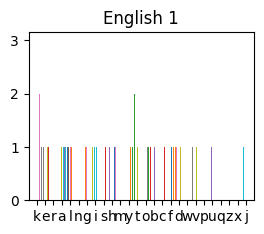

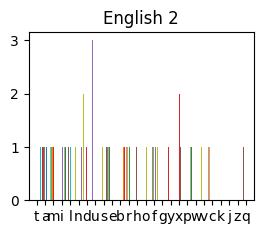

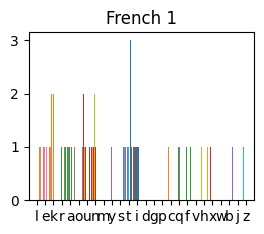

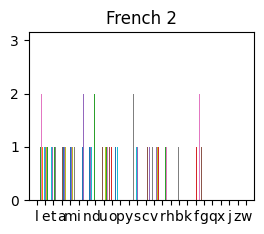

In [42]:
# PLotting Trigrams

plt.subplot(2, 2, 1)
plt.hist(trigram_eng1)
plt.title('English 1')
plt.show()

plt.subplot(2, 2, 2)
plt.hist(trigram_eng2)
plt.title('English 2')
plt.show()

plt.subplot(2, 2, 3)
plt.hist(trigram_fr1)
plt.title('French 1')
plt.show()

plt.subplot(2, 2, 4)
plt.hist(trigram_fr2)
plt.title('French 2')
plt.show()

## Question 2

In [28]:
from collections import Counter
import math


def calculate_entropy(text):
  total_len = len(text)
  char_count = Counter(text)
  entropy = 0

  for elem in char_count:
    prob = char_count[elem] * math.log2(total_len)
    entropy -= prob * math.log2(prob)

  return entropy

In [32]:
## set language and then download the data.

topic ='messi'

wikipedia.set_lang('en')
eng = wikipedia.page(topic).content

wikipedia.set_lang('fr')

fr = wikipedia.page(topic).content

In [33]:
def text_cleaning(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

# cleaning text

eng = text_cleaning(eng)
fr = text_cleaning(fr)


In [34]:
eng_entropy = calculate_entropy(eng)
fr_entropy = calculate_entropy(fr)

print("Entropy for English: ", eng_entropy)
print("Entropy for French: ", fr_entropy)

Entropy for English:  -3073542.4599901787
Entropy for French:  -2934164.2178063407


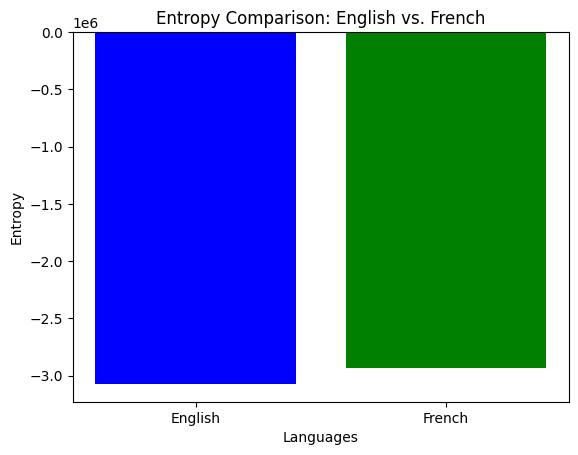

In [35]:
# Comparing entropy values

languages = ['English', 'French']
entropy_values = [eng_entropy, fr_entropy]

plt.bar(languages, entropy_values, color=['b', 'g'])
plt.xlabel('Languages')
plt.ylabel('Entropy')
plt.title('Entropy Comparison: English vs. French')
plt.show()

Entropy values closer to zero indicate more predictable and less random data, while higher entropy values indicate more unpredictability and randomness.

* Higher entropy may indicate more randomness and variability in the English text, while lower entropy suggests more structure and predictability.

* Higher entropy might imply that English text is more complex and diverse compared to French(English uses a larger variety of words or patterns)

## Question 3

In [61]:
from keras.datasets import mnist

import numpy as np
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

In [62]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/230
test_X = test_X/230

print("original data size:",train_X.shape)

original data size: (60000, 28, 28)


In [56]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


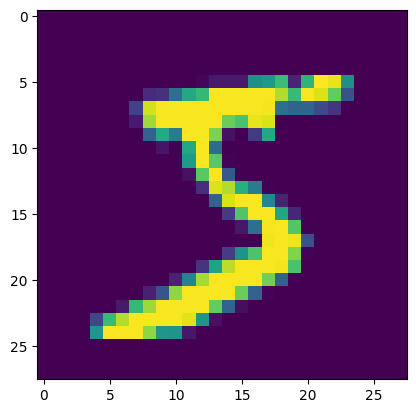

In [57]:
plt.imshow(train_X[0])
plt.show()

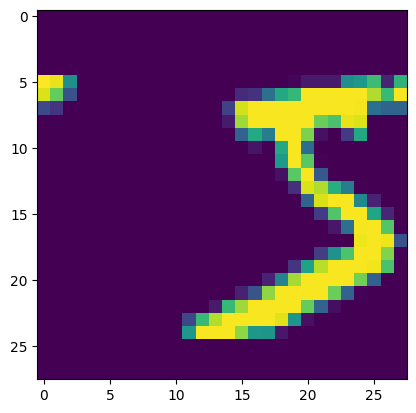

In [63]:
# Function for random horizontal shift

def horizontal_shift(img, max_shift):

  shift_amount = np.random.randint(-max_shift, max_shift + 1)
  shifted_image = np.roll(img, shift_amount, axis=1)
  return shifted_image

plt.imshow(horizontal_shift(train_X[0], 70))

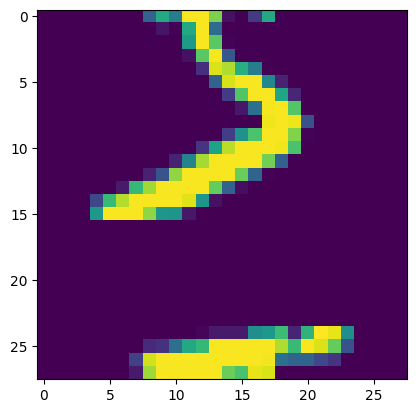

In [47]:
# Function for random vertical shift
def vertical_shift(img, max_shift):

  shift_amount = np.random.randint(-max_shift, max_shift + 1)
  shifted_image = np.roll(img, shift_amount, axis=0)
  return shifted_image

plt.imshow(vertical_shift(train_X[0], 70))

## Question 4

In [64]:
import wikipedia
from nltk.util import ngrams

# Download the data from wikipedia

topic = 'messi'

wikipedia.set_lang('en')
eng = wikipedia.page(topic).content

wikipedia.set_lang('fr')
fr = wikipedia.page(topic).content

In [65]:
def text_cleaning(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '', text)
  return text

# cleaning text
eng = text_cleaning(eng)
fr = text_cleaning(fr)

In [66]:
import numpy as np

def euclidean_distance(eng, fr):

  ngram_eng = Counter(eng)
  ngram_fr = Counter(fr)


  total_ngrams = list(set(ngram_eng.keys()) | set(ngram_fr.keys()))

  eng_count = np.array([eng.get(x, 0) for x in total_ngrams])
  fr_count = np.array([fr.get(x, 0) for x in total_ngrams])

  distance = np.linalg.norm(eng_count - fr_count)

  return distance

In [67]:
euclidean_distance = euclidean_distance(Counter(ngrams(eng,3)), Counter(ngrams(fr,3)))

print("Euclidean distance between English and French :", euclidean_distance)


Euclidean distance between English and French : 668.6127429237346


* **The result represents the extent of dissimilarity between the two texts based on the chosen n-grams**

* **The result obtained suggests that the two texts have a relatively high difference in their n-gram distributions. This indicates that the English and French texts are significantly dissimilar when considering the given n-grams as features.**



---



### Implications:

  Implications:

Flexibility: N-grams offer flexibility in terms of the size of the units being compared. You can use character-level n-grams (character n-grams) for fine-grained analysis or word-level n-grams (word n-grams) for a more semantic comparison. This flexibility allows you to adapt the approach to different use cases and languages.

Partial Matching: N-grams can capture partial similarities between texts. Even if entire sentences don't match, some overlapping n-grams might still indicate a certain level of similarity between texts. This is particularly useful when comparing texts with variations or paraphrased content.

Efficiency: Depending on the implementation, n-gram-based similarity comparison can be computationally efficient. The comparison involves simple operations like counting occurrences of n-grams in the text, which can be faster than more complex semantic approaches.

  Limitations:

Lack of Semantics: N-grams are purely based on sequential patterns and do not inherently capture semantic meaning. Similarity comparisons based solely on n-grams might miss texts with similar meanings but different wordings, leading to false negatives or inaccurate similarity assessments.

Sensitivity to Variations: N-grams are highly sensitive to small changes in the text. Even a single character change can result in entirely different n-grams, which could lead to inaccurate similarity measurements.

Size Dependency: The choice of n (the number of items in an n-gram) affects the results. Smaller n-grams capture more fine-grained details, while larger n-grams capture higher-level patterns. This choice can significantly impact the similarity scores and might need to be adjusted based on the context.

Fixed-Length Sequences: N-grams generate fixed-length sequences, which might not be suitable for texts of varying lengths. Longer texts could lead to more n-grams and potentially overshadow the similarity contribution of smaller, more meaningful units.

Out-of-Vocabulary Words: In word n-grams, words that are not present in the training data (out-of-vocabulary words) might lead to challenges in capturing their significance and similarity.

Scaling Issues: For large corpora or datasets, the memory and processing requirements for storing and comparing a large number of n-grams can become substantial.

Contextual Information: N-grams lack contextual information. They don't capture relationships between non-adjacent items in the text, which could be crucial for understanding the overall meaning and similarity.

Domain Sensitivity: The effectiveness of n-grams can vary across domains. Some domains might have specific vocabulary or phrasing that might not be adequately captured by generic n-gram models.






## Question 5

In [85]:
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

In [86]:
# Loading data from Gutenberg website

eng_url = 'https://www.gutenberg.org/cache/epub/236/pg236.txt'
fr_url = 'https://www.gutenberg.org/cache/epub/36098/pg36098.txt'

eng_raw = str(requests.get(eng_url).content)
fr_raw = str(requests.get(fr_url).content)

In [87]:
# cleaning the text

def text_cleaning(text):

  text = text.lower()
  text = re.sub('[^a-z]+', ' ', text)
  return text


eng_text = text_cleaning(eng_raw)
fr_text = text_cleaning(fr_raw)

In [88]:
# Calculating entropy for both texts

from collections import Counter
import math


def calculate_entropy(text):
  total_len = len(text)
  char_count = Counter(text)
  entropy = 0

  for elem in char_count:
    prob = char_count[elem] * math.log2(total_len)
    entropy -= prob * math.log2(prob)

  return entropy

print("Entropy for English: ", calculate_entropy(eng_text))
print("Entropy for French: ",(calculate_entropy(fr_text)))

Entropy for English:  -108419994.97077017
Entropy for French:  -18188410.577863015


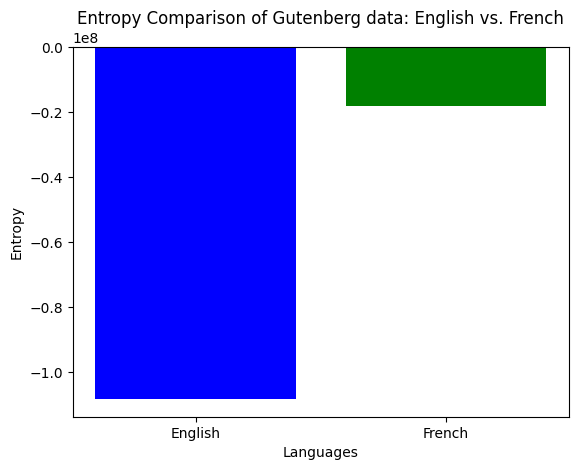

In [89]:
# Comparing entropy values

languages = ['English', 'French']
entropy_values = [calculate_entropy(eng_text), calculate_entropy(fr_text)]

plt.bar(languages, entropy_values, color=['b', 'g'])
plt.xlabel('Languages')
plt.ylabel('Entropy')
plt.title('Entropy Comparison of Gutenberg data: English vs. French')
plt.show()

In [90]:
# Calculating unigram, bigram and trigram for english and french

unigram_eng = Counter(ngrams(eng_text, 1))
bigram_eng = Counter(ngrams(eng_text, 2))
trigram_eng = Counter(ngrams(eng_text, 3))

unigram_fr = Counter(ngrams(fr_text, 1))
bigram_fr = Counter(ngrams(fr_text, 2))
trigram_fr = Counter(ngrams(fr_text, 3))

Plotting various ngrams

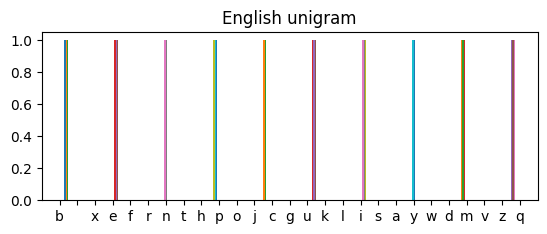

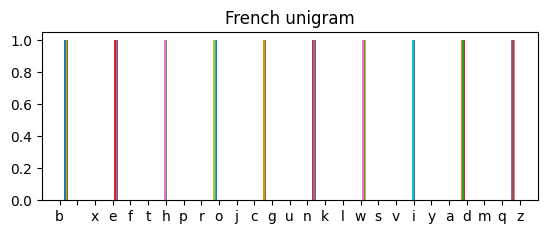

In [91]:
# Plotting unirigrams

plt.subplot(2, 1, 1)
plt.hist(unigram_eng)
plt.title('English unigram')
plt.show()

plt.subplot(2, 1, 2)
plt.hist(unigram_fr)
plt.title('French unigram')
plt.show()

plt.show()

We can see that the unigrams for English and French are very similar. So this is not a good feature if we want to distinguish between English and French.

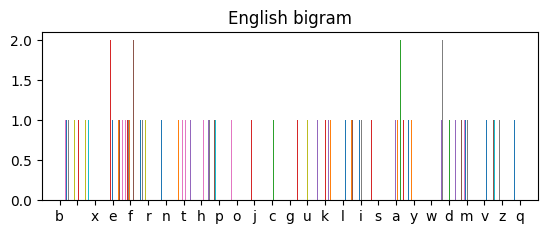

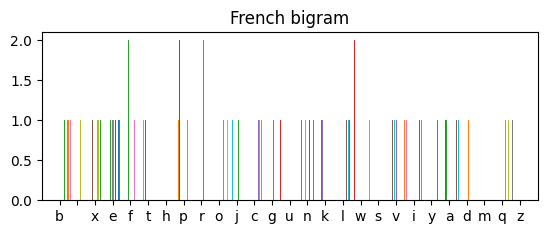

In [92]:
# Plotting bigrams

plt.subplot(2, 1, 1)
plt.hist(bigram_eng)
plt.title('English bigram')
plt.show()

plt.subplot(2, 1, 2)
plt.hist(bigram_fr)
plt.title('French bigram')
plt.show()

plt.show()

We can see that bigrams for English and French are also very similar. So this is not a good feature if we want to distinguish between English and French.

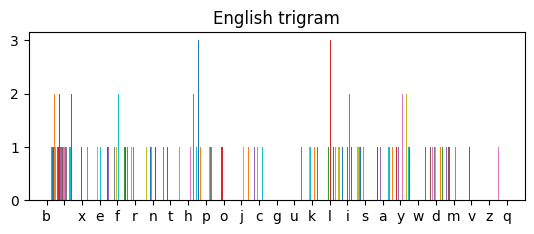

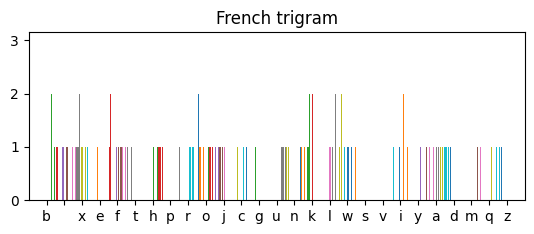

In [93]:
# Plotting trigrams

plt.subplot(2, 1, 1)
plt.hist(trigram_eng)
plt.title('English trigram')
plt.show()

plt.subplot(2, 1, 2)
plt.hist(trigram_fr)
plt.title('French trigram')
plt.show()

plt.show()

Its looks like trigrams for English and French are also very similar. So we need to use other to reduce features
